In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
# General question
#number of rows and column
rows_cols=data.shape
print("rows and columns", rows_cols)

rows and columns (920, 16)


In [21]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [23]:
# Value counts of the target variable
target_distribution = data['num'].value_counts()
print("Target variable distribution:\n", target_distribution)


Target variable distribution:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [25]:
patients_with_disease= target_distribution[1]
patients_with_no_disease= target_distribution[0]
print('patients_with_disease', patients_with_disease)
print('patients_with_no_disease',patients_with_no_disease)

patients_with_disease 265
patients_with_no_disease 411


In [27]:
# Calculating count of patients for each stage

stages_distribution=data['num'].value_counts().sort_index()

for stage, count in stages_distribution.items():
    print(f' Stage {stage}: {count} patients')

 Stage 0: 411 patients
 Stage 1: 265 patients
 Stage 2: 109 patients
 Stage 3: 107 patients
 Stage 4: 28 patients


In [28]:
# Age range of patients
age_min=data['age'].min()
age_max= data['age'].max()
print(f'Age range of patients: {age_min} to {age_max}')

Age range of patients: 28 to 77


In [29]:
# Gender distribution
gender_distribution= data['sex'].value_counts()
print(gender_distribution)

sex
Male      726
Female    194
Name: count, dtype: int64


In [32]:
# Average and Median of Resting blood pressure (trestbps), Serum cholesterol (chol), Maximum heart rate (thalach)

trestbps_mean= data['trestbps'].mean()
trestbps_median= data['trestbps'].median()

chol_mean = data['chol'].mean()
chol_median = data['chol'].median()

thalch_mean = data['thalch'].mean()
thalch_median = data['thalch'].median()

print(f"Average resting blood pressure: {trestbps_mean:.2f}, Median: {trestbps_median}")
print(f"Average cholesterol: {chol_mean:.2f}, Median: {chol_median}")
print(f"Average max heart rate: {thalch_mean:.2f}, Median: {thalch_median}")


Average resting blood pressure: 132.13, Median: 130.0
Average cholesterol: 199.13, Median: 223.0
Average max heart rate: 137.55, Median: 140.0


In [35]:
exercise_induced_angina= data['exang'].value_counts()
print("Exercise-induced angina counts (False= No, True = Yes):\n", exercise_induced_angina)

Exercise-induced angina counts (False= No, True = Yes):
 exang
False    528
True     337
Name: count, dtype: int64


In [37]:
chest_pain=data['cp'].value_counts()
print(chest_pain)

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


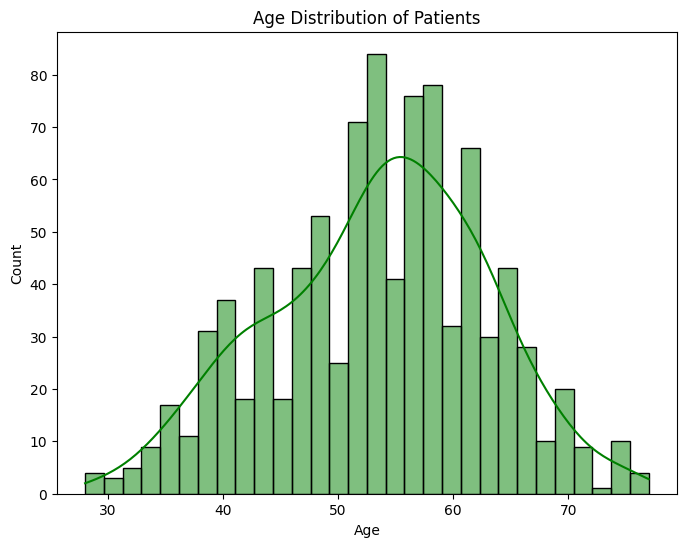

In [41]:
# Visuals Analysis
plt.figure(figsize=(8,6))
sns.histplot(data['age'], bins=30, kde=True, color='green')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

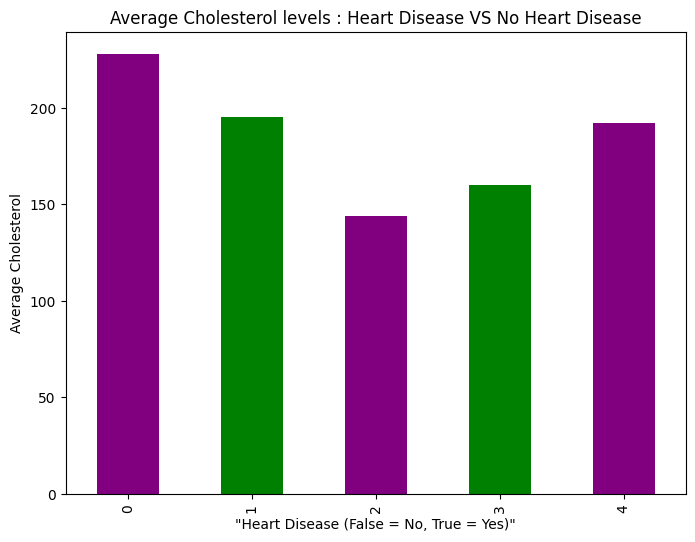

In [43]:
# average 
chol_by_target= data.groupby('num')['chol'].mean()

# Plot 
plt.figure(figsize=(8,6))
chol_by_target.plot(kind='bar', color=['purple','green'])
plt.title('Average Cholesterol levels : Heart Disease VS No Heart Disease')
plt.xlabel('"Heart Disease (False = No, True = Yes)"')
plt.ylabel("Average Cholesterol")
plt.show()

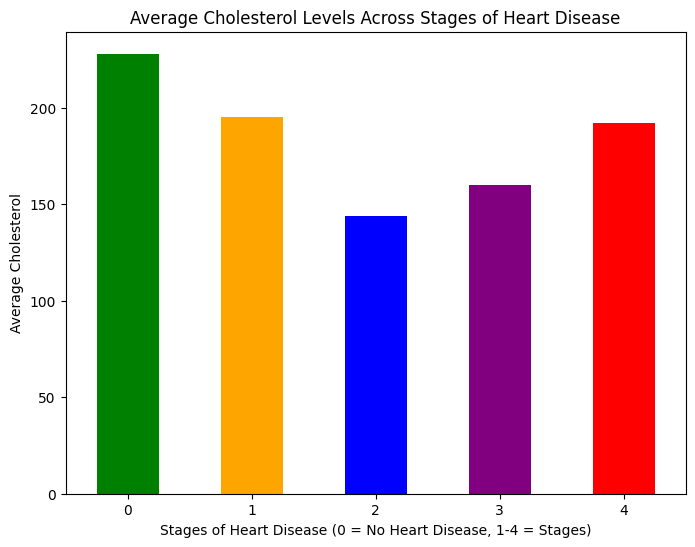

In [46]:
# Grouped cholesterol levels by target (including all stages)
chol_by_stage = data.groupby('num')['chol'].mean()

# Plot
plt.figure(figsize=(8, 6))
chol_by_stage.plot(kind='bar', color=['green', 'orange', 'blue', 'purple', 'red'])
plt.title("Average Cholesterol Levels Across Stages of Heart Disease")
plt.xlabel("Stages of Heart Disease (0 = No Heart Disease, 1-4 = Stages)")
plt.ylabel("Average Cholesterol")
plt.xticks(rotation=0) 
plt.show()


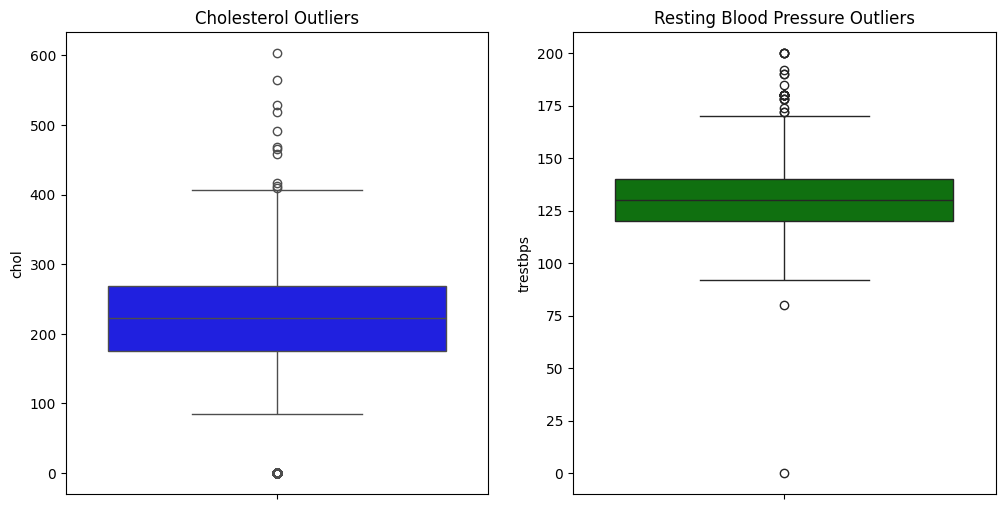

In [44]:
# Outliers detection Visualization
plt.figure(figsize=(12,6))

# Cholesterol
plt.subplot(1,2,1)
sns.boxplot(data['chol'], color='blue')
plt.title('Cholesterol Outliers')

# resting Blood pressure
plt.subplot(1,2,2)
sns.boxplot(data['trestbps'], color='green')
plt.title('Resting Blood Pressure Outliers')

plt.show()

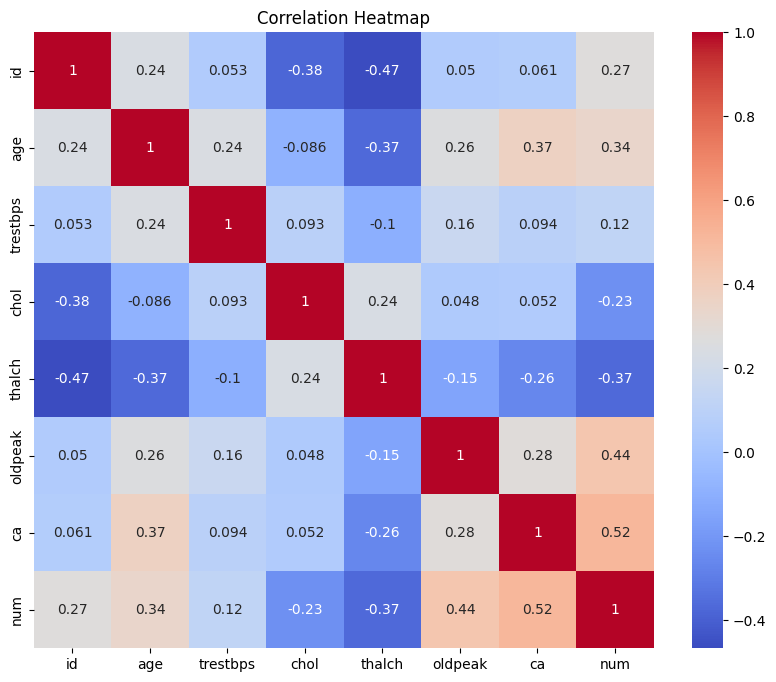

In [50]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()